# 1. About the Context

## 1.1 About the Business
- Superstore is a chain of supermarkets owned by Canadian food retailing giant Loblaw Companies.
- The stores carry a variety of goods, but the vast majority of space is devoted to groceries, and about a third of each store is set aside for electronics, housewares, and clothing.

## 1.2 About the Audience
- Data Leader: Have knowledge about business beside Data literacy is at a high level.
- HR Manager: Have high level in Business Expertise however Data literacy is at a lower level.

# 2.**About the Problem**

## 2.1 Problem Understanding
- The Marketing Department wants to run a marketing campaigns during Chrismas and New Year holidays to thank customers for their past support of company. In addition, potential customers can be upgraded to become loyal customers.
- The Marketing Director proposed a plan to run RFM Model in Python to segment customers and then launch appropriate marketing campaigns.
- Recommendation for Marketing and Sales Team: With the company's retail model, which of three indicators R,F,M shoulde be given the most attention?

## 2.2 Problem breaking down
- Using RFM Model to launch marketing campain to thank customers.
  - RFM Model
    - Recency (R): How recently a customer made a purchase. Customers who made purchases more recently are typically more engaged and likely to buy again.
    - Frequency (F): How often a customer makes purchases within a given period. Frequent buyers are usually more loyal and valuable to a business.
    - Monetary (M): How much money a customer spends in total. High spenders contribute significantly to revenue and can be prioritized for premium services or offers.
  - Run thank you campaigns for customers with the highest spending and high frequency segments
  - Run campaigns that are relevant to each customer segment
- Using RFM Model to explore potential loyal customer become loyal customer
  - Loyal customers
  - Potential Loyal customers -> Loyal customer
- Suggestions to Mareting and Sales Team with the company's retail model, which of three R,F and M should be most interested in?

# 3.**Outline**

## Import Packages

In [ ]:
!pip install squarify


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import warnings
warnings.filterwarnings('ignore')

## 3.1 Understand about data

### Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Path = 'drive/MyDrive/Final_RFM'

In [ ]:
#e_retail = pd.read_excel(Path + '/ecommerce_retail.xlsx',sheet_name= 'ecommerce retail')
#Segmentation = pd.read_excel(Path + '/ecommerce_retail.xlsx',sheet_name= 'Segmentation')
#Final_project_guidelines = pd.read_excel(Path + '/Final_project_guidelines.xlsx',sheet_name= 'Context')

In [ ]:
e_retail = pd.read_excel('ecommerce_retail.xlsx',sheet_name= 'ecommerce retail')
Segmentation = pd.read_excel('ecommerce_retail.xlsx',sheet_name= 'Segmentation')

## 3.2 EDA

### Tóm tắt các bước tiền xử lý dữ liệu

- **Chuyển đổi kiểu dữ liệu:**  
  Các cột `InvoiceNo`, `StockCode`, `Description`, `CustomerID`, `Country` được chuyển sang kiểu *string* để đảm bảo tính nhất quán.

- **Loại bỏ dữ liệu không hợp lệ:**  
  Loại bỏ các bản ghi có:
  - `Quantity < 0`
  - `UnitPrice < 0`
  - `Cancel_list = True`
  - `Description` là giá trị thiếu  
  Thay thế các giá trị thiếu `nan`, `Nan`, `<NA>` bằng `None`.  
  Việc này giúp loại bỏ các dữ liệu không chính xác, ảnh hưởng đến kết quả phân tích RFM.

- **Xử lý missing value:**  
  Kiểm tra missing value và nhận thấy cột `CustomerID` có giá trị thiếu.  
  Loại bỏ các bản ghi có `CustomerID` missing vì không thể phân tích RFM cho những khách hàng này.

- **Loại bỏ bản ghi trùng lặp:**  
  Phát hiện và loại bỏ các bản ghi trùng lặp dựa trên các cột:  
  `InvoiceNo`, `StockCode`, `InvoiceDate`, `CustomerID`.  
  Việc này đảm bảo mỗi giao dịch chỉ được tính một lần trong phân tích RFM.


### Get info about data type & data value

In [ ]:
e_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
e_retail.info()
print('----------')
e_retail.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
----------


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
e_retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


1. Detect cột những cột data value bất thường

- Data value của Quantity < 0

In [ ]:
e_retail[e_retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
e_retail['Cancel_list'] = e_retail['InvoiceNo'].apply(lambda x: True if str(x)[0] == 'C' else False)
e_retail[(e_retail['Quantity']<0) & (e_retail['Cancel_list'] == True)].head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,True


In [ ]:
e_retail[(e_retail['Quantity']<0) & (e_retail['Cancel_list'] == False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,NaN,United Kingdom,False
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,NaN,United Kingdom,False
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,NaN,United Kingdom,False
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,NaN,United Kingdom,False
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,NaN,United Kingdom,False


In [ ]:
e_retail[(e_retail['Cancel_list'] == False) & (e_retail['Quantity'] < 0)]['Description'].value_counts()

,count
Description,
check,120
damages,45
damaged,42
?,41
sold as set on dotcom,20
...,...
lost??,1
wet,1
wet boxes,1


- Data value của UnitPrice < 0

Handle  abnormal data values

In [ ]:
e_retail = e_retail[e_retail['Quantity']>=0]
e_retail = e_retail[e_retail['Cancel_list'] == False]

In [ ]:
e_retail[e_retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False


In [ ]:

e_retail = e_retail[e_retail['UnitPrice'] >= 0]
e_retail = e_retail[e_retail['Description'] != '<Na>']

### Handling of inappropriate data types and data values


In [ ]:
#Convert data type to correct format
type_list = ['InvoiceNo','StockCode','Description','CustomerID','Country']
for i in type_list:
  e_retail[i] = e_retail[i].astype('string')

In [ ]:
#Drop data not matching
e_retail = e_retail.replace('nan',None)
e_retail = e_retail.replace('Nan',None)
e_retail = e_retail.replace('<NA>',None)


In [ ]:
#Check missing value
missing_value = {
                 'volume': e_retail.isnull().sum(),
                 'percent':e_retail.isnull().sum()/ (e_retail.shape[0])
                 }
missing_value = pd.DataFrame(missing_value)
missing_value

,volume,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,592,0.001114
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,133359,0.251013
Country,0,0.000000
Cancel_list,0,0.000000


In [ ]:
null_customers = e_retail[e_retail['CustomerID'].isnull()]
null_customers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
622,536414,22139,<NA>,56,2010-12-01 11:52:00,0.00,<NA>,United Kingdom,False
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False


In [ ]:
#Missing value
#Drop CustomerID is missing
e_retail = e_retail[e_retail['CustomerID'].notnull()]
e_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
#Check duplicate
dup_retail = e_retail[e_retail.duplicated(subset = ['InvoiceNo','StockCode','InvoiceDate','CustomerID'], keep = 'first')]
dup_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,False
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,False
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,False
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False


In [ ]:
#Drop duplicated value
final_retail = e_retail.drop_duplicates(subset = ['InvoiceNo','StockCode','InvoiceDate','CustomerID'], keep = 'first')
final_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
final_retail['cost'] = final_retail['Quantity'] * final_retail['UnitPrice']
final_retail['Day'] = final_retail['InvoiceDate'].dt.day
final_retail['Month'] = final_retail['InvoiceDate'].dt.month
final_retail['Year'] = final_retail['InvoiceDate'].dt.year
final_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list,cost,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010


In [ ]:
final_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387880 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387880 non-null  string        
 1   StockCode    387880 non-null  string        
 2   Description  387880 non-null  string        
 3   Quantity     387880 non-null  int64         
 4   InvoiceDate  387880 non-null  datetime64[ns]
 5   UnitPrice    387880 non-null  float64       
 6   CustomerID   387880 non-null  string        
 7   Country      387880 non-null  string        
 8   Cancel_list  387880 non-null  bool          
 9   cost         387880 non-null  float64       
 10  Day          387880 non-null  int32         
 11  Month        387880 non-null  int32         
 12  Year         387880 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), int64(1), string(5)
memory usage: 34.4 MB


## 3.3 DATA PROCESSING


### RFM


In [ ]:
#Calculate Recency, Frequency, Monetory
RFM = final_retail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (final_retail['InvoiceDate'].max() - x.max()).days,
                                              'InvoiceNo': lambda x: len(x),
                                              'cost': lambda x: x.sum()

                                            }).reset_index()
RFM.columns = ['CustomerID','Recency','Frequency','Monetary']
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,27,1595.64
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,83,2042.24
6,12353.0,203,4,89.00
7,12354.0,231,58,1079.40
8,12355.0,213,13,459.40
9,12356.0,22,59,2811.43


In [ ]:
#Get R, F, M score by using qcut
#Get label for qcut
lab_des = [5,4,3,2,1]
lab_asc = [1,2,3,4,5]

#Using qcut
#qcut is a function used to divide data into equal-sized bins based on quantiles
RFM['R'] = pd.qcut(RFM['Recency'], q = 5, labels = lab_des) #Score desc
RFM['F'] = pd.qcut(RFM['Frequency'], q = 5, labels = lab_asc)
RFM['M'] = pd.qcut(RFM['Monetary'], q = 5, labels = lab_asc)
RFM['RFM'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)
RFM['RFM'] = RFM['RFM'].astype('string')
RFM.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,182,4310.00,5,5,5,555
2,12348.0,74,27,1595.64,2,2,4,224
3,12349.0,18,73,1757.55,4,4,4,444
4,12350.0,309,17,334.40,1,2,2,122


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(',')
Segmentation = Segmentation.explode('RFM Score').reset_index(drop = True)
Segmentation.head(10)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].astype('string')
Segmentation['Segment'] = Segmentation['Segment'].astype('string')

In [ ]:
Segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    string
 1   RFM Score  125 non-null    string
dtypes: string(2)
memory usage: 2.1 KB


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].apply(lambda x: x.strip())

In [ ]:
RFM_final = RFM.merge(Segmentation, how = 'left', left_on = 'RFM', right_on = 'RFM Score')
RFM_final.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12347.0,1,182,4310.00,5,5,5,555,Champions,555
2,12348.0,74,27,1595.64,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,4,4,4,444,Loyal,444
4,12350.0,309,17,334.40,1,2,2,122,Hibernating customers,122
5,12352.0,35,83,2042.24,3,4,4,344,Loyal,344
6,12353.0,203,4,89.00,1,1,1,111,Lost customers,111
7,12354.0,231,58,1079.40,1,4,4,144,Cannot Lose Them,144
8,12355.0,213,13,459.40,1,1,2,112,Lost customers,112
9,12356.0,22,59,2811.43,4,4,5,445,Champions,445


In [ ]:
# Calculate number of customers share and Monetory share
segmentation_data = RFM_final.groupby('Segment').agg(cus_count=('CustomerID','count'),
                                                    sum_recency=('Recency','sum'),
                                                    sum_frequency=('Frequency','sum'),
                                                    sum_monetory=('Monetary','sum')
                                                    ).round(1).reset_index()

segmentation_data['rate_customer'] = (segmentation_data['cus_count']*100/segmentation_data['cus_count'].sum()).round(2)
segmentation_data['rate_recency'] = (segmentation_data['sum_recency']*100/segmentation_data['sum_recency'].sum()).round(2)
segmentation_data['rate_frequency'] = (segmentation_data['sum_frequency']*100/segmentation_data['sum_frequency'].sum()).round(2)
segmentation_data['rate_monetory'] = (segmentation_data['sum_monetory']*100/segmentation_data['sum_monetory'].sum()).round(2)

segmentation_data.sort_values(by='cus_count',inplace=True)
segmentation_data

,Segment,cus_count,sum_recency,sum_frequency,sum_monetory,rate_customer,rate_recency,rate_frequency,rate_monetory
2,Cannot Lose Them,89,19685,4556,294868.1,2.05,4.96,1.17,3.33
10,Promising,137,2393,2260,326704.2,3.16,0.60,0.58,3.69
0,About To Sleep,193,16771,4197,53231.2,4.45,4.22,1.08,0.60
7,Need Attention,231,7393,13063,341270.9,5.32,1.86,3.37,3.86
8,New Customers,311,8770,3480,63949.4,7.17,2.21,0.90,0.72
1,At Risk,412,63256,32507,632903.7,9.50,15.93,8.38,7.16
6,Loyal,413,15583,48309,974973.7,9.52,3.92,12.45,11.02
5,Lost customers,426,118204,5053,74230.2,9.82,29.77,1.30,0.84
9,Potential Loyalist,514,14316,30568,296324.3,11.85,3.61,7.88,3.35
3,Champions,804,8501,225098,5462794.0,18.53,2.14,58.03,61.76


## 3.4 Visualization & Insight

### Describe Recency, Frequency and Monetory

In [ ]:
RFM_final.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,89.393870,2038.383130
std,100.009747,222.266107,8975.587701
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,304.830000
50%,50.000000,41.000000,658.640000
75%,141.000000,97.000000,1647.690000
max,373.000000,7477.000000,280206.020000


**Recency, Frequency and Monetory value of Superstore**:
- Recency: Mean (91.52), customers made their last purchase around 92 days ago, with the median being much lower (50 days). This suggests a core group of customers has engaged recently, but there are many who haven't purchased in a long time.
- Frequency: Mean (89.39), customers purchase frequently; however, the median (41) is significantly lower, indicating a wide gap between a few very active customers (outliers) and the rest.
- Monetary: Mean (2,038.38), average customer spending is high but is skewed by outliers, as the median is only 658.64.

**Recommendation**:
- Recency should be the primary focus to engage active and dormant customers effectively during holiday campaigns.

- Frequency is critical for converting moderate buyers into loyal customers.

- Monetary is useful to guide premium campaigns for high-value customers but not as central for broad engagement goals.

### Visualize Rate Recency, Frenquency, Monetary by number of Customers by Segment


Number of customers by RFM Segment

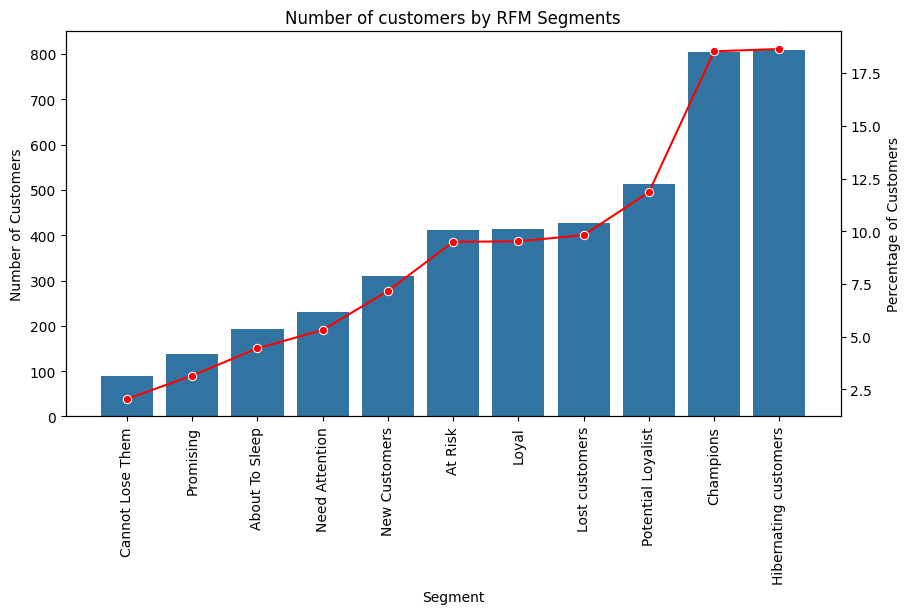

In [ ]:
fig, ax1 = plt.subplots(1,figsize = (10,5))
ax2 = ax1.twinx()
sns.barplot(data= segmentation_data,
            x='Segment',
            y= 'cus_count',
           # palette='tab10',
            ax=ax1)

sns.lineplot(data = segmentation_data.sort_values('rate_customer'),
             x = 'Segment',
             y = 'rate_customer',
             marker = 'o',
             color = 'red')
ax1.set(xlabel='Segment', ylabel='Number of Customers')
ax2.set(ylabel='Percentage of Customers')
ax1.tick_params(axis='x', rotation=90)
plt.title('Number of customers by RFM Segments')
plt.show()

- The number of Hibernating customers is highest with 809 customers and 18.64%. Beside, Champions have 804 customers and 18.53%
- Cannot Lose Them segment have the lowest customer even so rate customer with 89 customers and 2.05%


#### Total cost

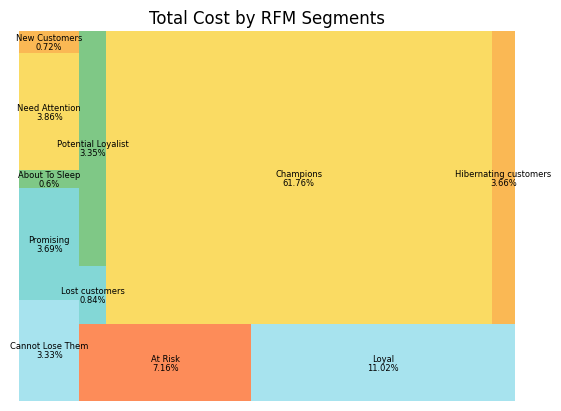

In [ ]:
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']
#
count_map1 = sq.plot(sizes=segmentation_data['rate_monetory'],
                    label=segmentation_data['Segment'],
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['rate_monetory']],
                    color = colors)
plt.title('Total Cost by RFM Segments')
plt.axis("off")
plt.show()

#### Rate of recency and frequency

- Segment with the highest total cost revenue: Champions(5462794.0 dollars, equivalent to 61,76%) and Loyal segment(974973.7 dollars and equivalent to 11.02%)
- Segment with the lowest total cost: About To Sleep(53231.2 dollars, equivaltent to 0.6%), New Customers(63949.4 dollars, equivalent to 0.72%)

**Recommend**
- Champions & Loyal Customers
  - Offer exclusive discounts, VIP memberships, or early access to new products.
  - Implement a loyalty rewards program to encourage continuous spending.
- At Risk & Cannot Lose Them
  - Send personalized retention emails, highlighting their past interactions and offering incentives to return.
  - Create targeted reactivation campaigns with special offers and reminders.
- New & Lost Customers
  - Improve onboarding experience (welcome emails, personalized recommendations, discounts for first purchases).
  - Implement remarketing campaigns for lost customers via email or social ads.

Recency & Frequency rate by Segment

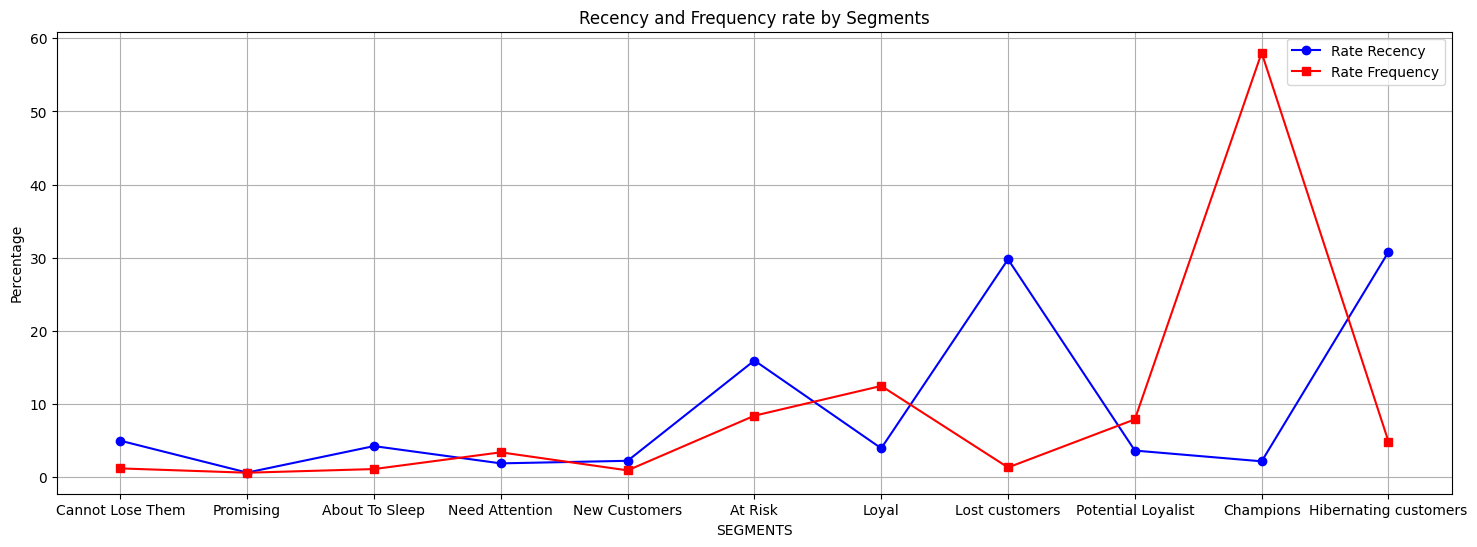

In [ ]:
# Set up figsize
fig, ax = plt.subplots(1, figsize=(18, 6))

# Line plot
ax.plot(segmentation_data['Segment'], segmentation_data['rate_recency'], marker='o', color='blue', label='Rate Recency')
ax.plot(segmentation_data['Segment'], segmentation_data['rate_frequency'], marker='s', color='red', label='Rate Frequency')

# Label and Tittle
ax.set_title('Recency and Frequency rate by Segments')
ax.set_xlabel('SEGMENTS')
ax.set_ylabel('Percentage')
ax.grid(True)
ax.legend()



- Champions and Loyal show  high frequency and low recency, meaning they are highly engaged and valuable
- At Risk & Cannot Lose Them have low frequency but high recency
- Lost Customers & Hibernating Customers have both high recency and low frequency, indicating they are no longer contributing to business revenue.
- New Customers & Promising Customers have moderate frequency but low recency, meaning they have potential but are not fully engaged yet.

**Recommend**
- Champions & Loyal Customers
  - Implement a VIP program or exclusive rewards to maintain loyalty.
  - Send personalized early-access offers or targeted discounts.
- At Risk & Cannot Lose Them
  - Launch re-engagement campaigns via email or retargeting ads.
  - Offer win-back promotions to encourage them to purchase again.
- Lost Customers & Hibernating Customers
  - Identify reasons for disengagement through feedback surveys.
  - Provide a limited-time special offer tailored to their past purchasing behavior.
- New & Promising Customers
  - Enhance onboarding experience with personalized product recommendations.
  - Use welcome discounts or incentives to increase conversion rates.

## 3.5 Loyal customer, Non Loyal customer

In [ ]:
RFM_final['Loyal_list'] = RFM_final['Segment'].apply(lambda x: 'Loyal' if (x == 'Loyal' or x == 'Potential Loyalist') else 'Non Loyal')
RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score,Loyal_list
0,12346.0,325,1,77183.60,1,1,5,115,Cannot Lose Them,115,Non Loyal
1,12347.0,1,182,4310.00,5,5,5,555,Champions,555,Non Loyal
2,12348.0,74,27,1595.64,2,2,4,224,At Risk,224,Non Loyal
3,12349.0,18,73,1757.55,4,4,4,444,Loyal,444,Loyal
4,12350.0,309,17,334.40,1,2,2,122,Hibernating customers,122,Non Loyal


In [ ]:
df = RFM_final.merge(final_retail, how = 'left', on = 'CustomerID')
data = df[['CustomerID','InvoiceNo','InvoiceDate','Quantity','UnitPrice','cost','Country','Cancel_list','Segment','Loyal_list','Year','Month']]


In [ ]:
segment_data = data.groupby(['Segment']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
segment_data.sort_values(by = 'Sales_sum', ascending = False, inplace = True)
segment_data

,Segment,Sales_sum,Sales_mean,Invoice_ord,Quantity
3,Champions,5462794.030,24.268514,9672,3099201
6,Loyal,974973.720,20.182031,2174,581813
1,At Risk,632903.660,19.469765,1354,389007
7,Need Attention,341270.890,26.125001,888,216825
10,Promising,326704.170,144.559367,407,175911
4,Hibernating customers,323294.751,17.206597,1292,198933
9,Potential Loyalist,296324.311,9.693938,1277,184254
2,Cannot Lose Them,294868.061,64.720821,272,166577
5,Lost customers,74230.220,14.690327,478,40627
8,New Customers,63949.420,18.376270,446,51755


### Loyal Customer

In [ ]:
potential = data.query('Segment == "Potential Loyalist" or Segment == "Loyal" or Segment == "Champions"')
potential.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,cost,Country,Cancel_list,Segment,Loyal_list,Year,Month
1,12347.0,537626,2010-12-07 14:57:00,12,2.10,25.2,Iceland,False,Champions,Non Loyal,2010,12
2,12347.0,537626,2010-12-07 14:57:00,4,4.25,17.0,Iceland,False,Champions,Non Loyal,2010,12
3,12347.0,537626,2010-12-07 14:57:00,12,3.25,39.0,Iceland,False,Champions,Non Loyal,2010,12
4,12347.0,537626,2010-12-07 14:57:00,36,0.65,23.4,Iceland,False,Champions,Non Loyal,2010,12
5,12347.0,537626,2010-12-07 14:57:00,12,1.25,15.0,Iceland,False,Champions,Non Loyal,2010,12


In [ ]:
segment_potential = potential.groupby(['Segment','Year','Month']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
segment_potential['Avg_order_value'] = (segment_potential['Sales_sum']/segment_potential['Invoice_ord']).round(2)
segment_potential['Rate_sale'] = (segment_potential['Sales_sum']*100/segment_potential['Sales_sum'].sum()).round(2)

segment_potential.head()

,Segment,Year,Month,Sales_sum,Sales_mean,Invoice_ord,Quantity,Avg_order_value,Rate_sale
0,Champions,2010,12,369393.54,26.253983,750,195416,492.52,5.49
1,Champions,2011,1,312513.40,25.521715,519,179900,602.15,4.64
2,Champions,2011,2,267823.45,26.298453,482,155670,555.65,3.98
3,Champions,2011,3,361539.61,24.921735,652,209868,554.51,5.37
4,Champions,2011,4,238588.03,20.037627,568,150877,420.05,3.54


#### Sales and Order value

Average Order Value **(AOV)** is a key metric in e-commerce and business analytics that measures the average amount of money spent per order.

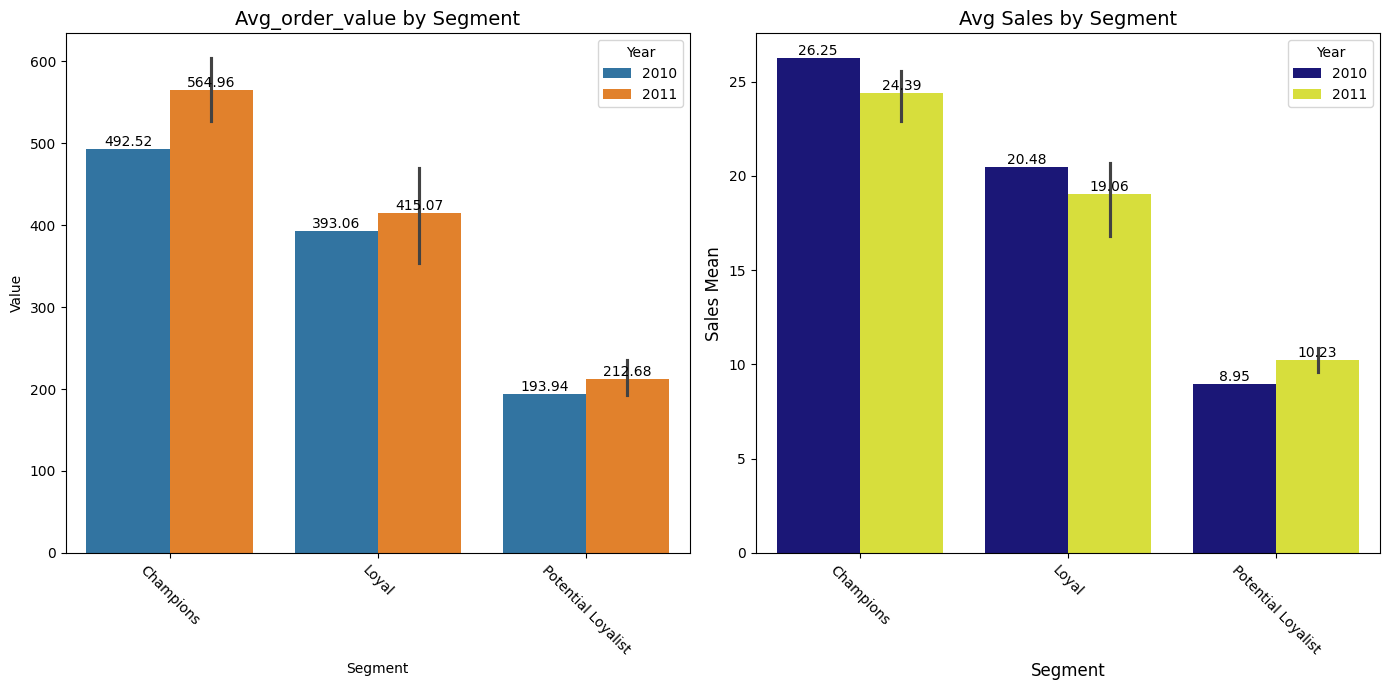

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7), sharey=False)
###Set plot for Avg_order_value
sns.barplot(data=segment_potential, x='Segment', y='Avg_order_value',hue = 'Year',palette='tab10', ax=ax0)
ax0.set_title('Avg_order_value by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-45)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


###Set plot for Avg Sales by Segment
sns.barplot(data=segment_potential, x='Segment', y='Sales_mean',hue = 'Year', palette='plasma', ax=ax1)
ax1.set_title('Avg Sales by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales Mean', fontsize=12)
ax1.tick_params(axis='x', rotation=-45)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()


**Conclude:** Although the average sale is down, the value of each order is high. Customers tend to buy fewer products but the value of each product is high. It is necessary to add more products at average prices or launch promotions to attract customers to come back to shop. In addition, the company should launch promotions as well as reduce the value of each order to be more balanced.


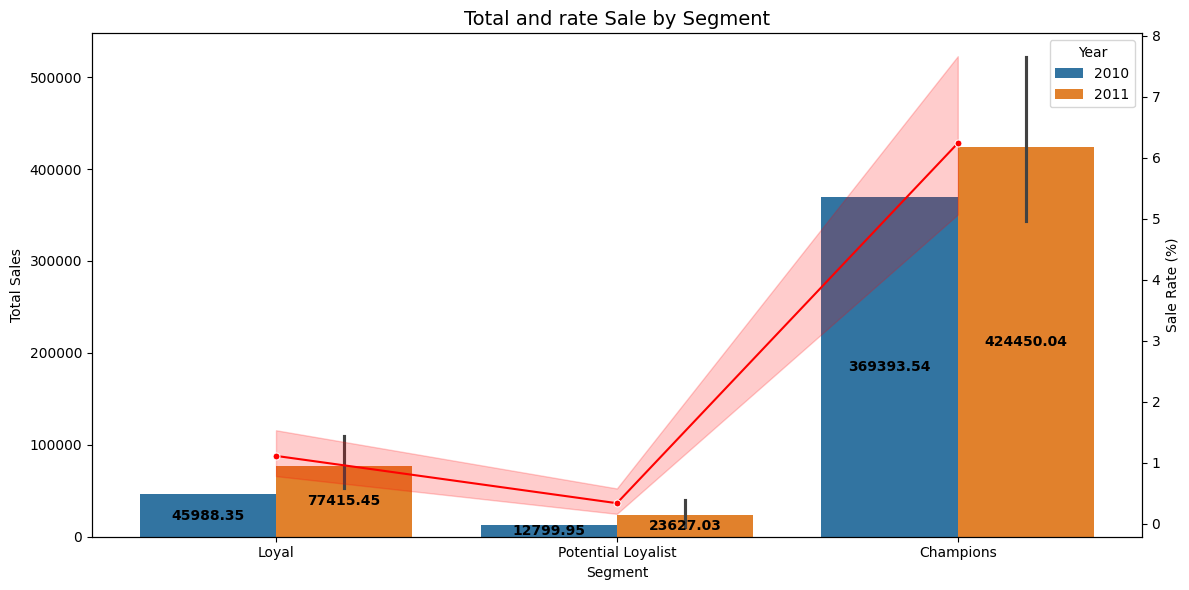

In [ ]:

fig, (ax0) = plt.subplots(1, figsize=(12, 6))
ax1 = ax0.twinx()
# Bar plot (Total Sales)
sns.barplot(data=segment_potential.sort_values('Sales_sum'),
            x='Segment',
            y='Sales_sum',
            hue='Year',
            palette='tab10',
            ax=ax0)

# Line plot (Sales Rate)
sns.lineplot(data=segment_potential.sort_values('Rate_sale'),
             x='Segment',
             y='Rate_sale',
             marker='o',
             color='red',
             markersize=5,
             ax=ax1,
             legend=False)

# Formatting
ax0.set_title('Total and rate Sale by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Total Sales')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Sale Rate (%)')

ax1.tick_params(axis='x', rotation=90)

for p in ax0.patches:
    height = p.get_height()
    if height > 0:
        ax0.annotate(format(height, '.2f'),
                     (p.get_x() + p.get_width() / 2., height / 2),
                     ha='center', va='center',
                     fontsize=10, color='black',
                     fontweight='bold')

plt.tight_layout()
plt.show()





### Non Loyal Customer

In [ ]:
non_potential = data.query('Segment != "Potential Loyalist" and Segment != "Loyal" and Segment != "Champions"')
non_potential.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,cost,Country,Cancel_list,Segment,Loyal_list,Year,Month
0,12346.0,541431,2011-01-18 10:01:00,74215,1.04,77183.6,United Kingdom,False,Cannot Lose Them,Non Loyal,2011,1
183,12348.0,539318,2010-12-16 19:09:00,72,0.55,39.6,Finland,False,At Risk,Non Loyal,2010,12
184,12348.0,539318,2010-12-16 19:09:00,72,0.55,39.6,Finland,False,At Risk,Non Loyal,2010,12
185,12348.0,539318,2010-12-16 19:09:00,24,0.55,13.2,Finland,False,At Risk,Non Loyal,2010,12
186,12348.0,539318,2010-12-16 19:09:00,24,0.55,13.2,Finland,False,At Risk,Non Loyal,2010,12


In [ ]:
seg_non_potential = non_potential.groupby(['Segment','Year']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
seg_non_potential['Avg_order_value'] = (seg_non_potential['Sales_sum']/seg_non_potential['Invoice_ord']).round(2)
seg_non_potential['Rate_sale'] = (seg_non_potential['Sales_sum']*100/seg_non_potential['Sales_sum'].sum()).round(2)
seg_non_potential.head(5)

,Segment,Year,Sales_sum,Sales_mean,Invoice_ord,Quantity,Avg_order_value,Rate_sale
0,About To Sleep,2010,1145.50,19.415254,9,1160,127.28,0.05
1,About To Sleep,2011,52085.67,12.587160,267,36416,195.08,2.47
2,At Risk,2010,49162.41,15.253618,124,28825,396.47,2.33
3,At Risk,2011,583741.25,19.933795,1230,360182,474.59,27.66
4,Cannot Lose Them,2010,27508.62,28.301049,65,15878,423.21,1.30


#### Sales and Order value

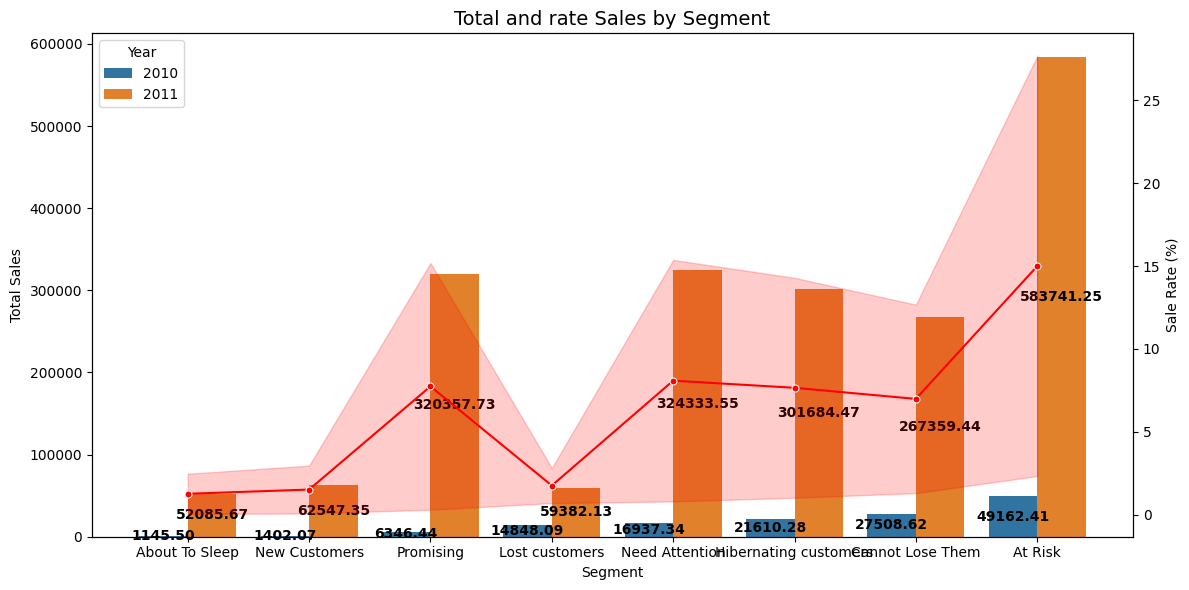

In [ ]:
fig, (ax0) = plt.subplots(1, figsize=(12, 6))
ax1 = ax0.twinx()
# Bar plot (Total Sales)
sns.barplot(data=seg_non_potential.sort_values('Sales_sum'),
            x='Segment',
            y='Sales_sum',
            hue='Year',
            palette='tab10',
            ax=ax0)

# Line plot (Sales Rate)
sns.lineplot(data=seg_non_potential.sort_values('Rate_sale'),
             x='Segment',
             y='Rate_sale',
             marker='o',
             color='red',
             markersize=5,
             ax=ax1,
             legend=False)

# Formatting
ax0.set_title('Total and rate Sales by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Total Sales')
ax1.set_xlabel('Segment')
ax1.set_ylabel('Sale Rate (%)')

ax1.tick_params(axis='x', rotation=90)

for p in ax0.patches:
    height = p.get_height()
    if height > 0:
        ax0.annotate(format(height, '.2f'),
                     (p.get_x() + p.get_width() / 2., height / 2),
                     ha='center', va='center',
                     fontsize=10, color='black',
                     fontweight='bold')


plt.tight_layout()
plt.show()

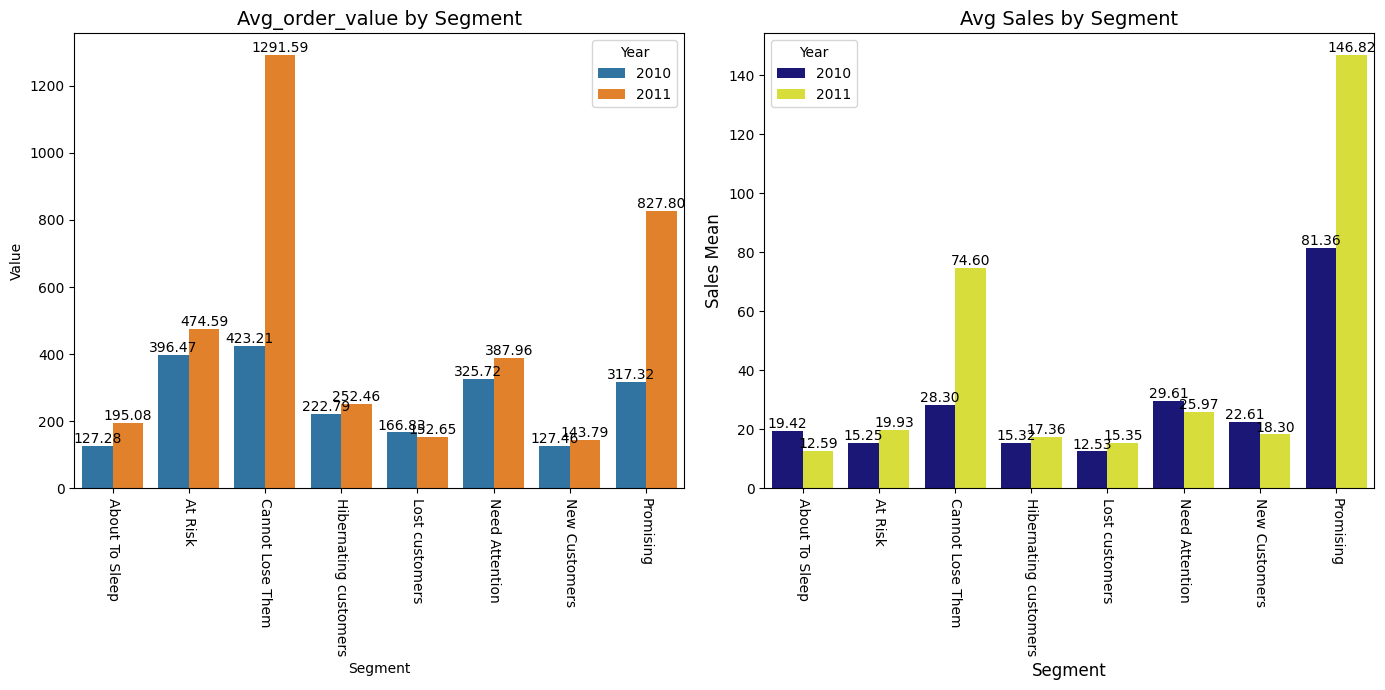

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7), sharey=False)
###Set plot for Avg_order_value
sns.barplot(data=seg_non_potential, x='Segment', y='Avg_order_value',hue = 'Year',palette='tab10', ax=ax0)
ax0.set_title('Avg_order_value by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-90)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


###Set plot for Avg Sales by Segment
sns.barplot(data=seg_non_potential, x='Segment', y='Sales_mean',hue = 'Year', palette='plasma', ax=ax1)
ax1.set_title('Avg Sales by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales Mean', fontsize=12)
ax1.tick_params(axis='x', rotation=-90)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

##### Insights and Recommendations
1. Total Sales by Segment
  - Massive Growth in Total Sales Across Segments (2011):
    - At Risk: From 79,162.41 (2010) to 583,741.25 (2011)—a huge increase. However, these customers are still at risk, so continuous attention is crucial.
    - Cannot Lose Them: Sales grew nearly tenfold, from 27,508.62 (2010) to 267,359.44 (2011). This segment clearly holds immense potential, reinforcing their critical role in revenue generation.
  - Total Sale of At Risk, Need Attention, Promising, Hibernating customers is larger than total sale of Potential Loyalist in 2010-2011. Can further evaluate the segmentation of customer groups that can become Loyal Segments
2. Avg_order_value by Segment
  - Promising Segment: The average order value jumped significantly from 317.32 (2010) to 827.80 (2011). This indicates that customers in this segment may be responding well to higher-value products or pricing strategies.
  - Cannot Lose Them Segment: Although this segment only appears in 2011 with an extremely high avg_order_value of 1291.59, its introduction could represent a strategy to identify and retain high-value customers.
  - Need Attention & At Risk Segments: Both segments experienced steady growth in avg_order_value, suggesting a positive response from these customers to improved product offerings or pricing strategies.
  - Hibernating, Lost, and About To Sleep Segments: These segments saw modest increases, signaling that while they are engaging more with higher-value purchases, they remain less responsive compared to other segments.

3. Avg Sales by Segment
  - Promising Segment: Sales mean skyrocketed from 81.36 (2010) to 146.82 (2011), reflecting an increase in purchasing activity.

  - Cannot Lose Them Segment: The sales mean rose dramatically from 28.30 (2010) to 74.60 (2011), reinforcing the importance of this high-value group.

  - At Risk Segment: Despite avg_order_value increasing, sales mean decreased from 19.93 (2010) to 15.25 (2011), indicating a decline in purchase frequency or basket size.

  - About To Sleep & New Customers: Both experienced a drop in sales mean, suggesting reduced purchasing activity, which could indicate disengagement.

**Recommendations**
1. Strengthen Loyalty for High-Potential Segments
  - Prioritize Cannot Lose Them and Promising Segments with personalized offers, loyalty programs, and premium experiences.
  - Implement cross-sell and upsell strategies to maximize revenue from these engaged groups.
2. Focus on High-Potential Segments
  - Promissing Segment:
    - PLeverage their growth momentum by introducing loyalty programs or exclusive offers.
    - Expand product to targeted at this segment's preferences
  - Cannot Lose Them Segment:
    - Invest in personalized marketing stratedgies and prioritize customer service for this group
3. Strengthen Retention Strategies for Hibernating & Lost Customers
  - Offer campaigns aimed at reactivating these segments, discounts or exclusive sales.
  - Analyze their purchasing history to identify products that previously resonated with them and highlight these in campaigns.
4. Re-engage Declining Segments
  - Investigate reasons for declining sales mean through surveys or feedback campaigns.
  - Reconnect with customers through personalized offers or incentives to reactivate engagement.